In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
import cv2
import os

def extract_frames_from_class_folders(input_folder, output_folder):
    class_folders = [folder for folder in os.listdir(input_folder) if os.path.isdir(os.path.join(input_folder, folder))]

    for class_folder in class_folders:
        class_input_folder = os.path.join(input_folder, class_folder)
        class_output_folder = os.path.join(output_folder, class_folder)
        os.makedirs(class_output_folder, exist_ok=True)

        video_files = [f for f in os.listdir(class_input_folder) if f.endswith(('.mp4', '.avi', '.mov'))]

        for video_file in video_files:
            video_path = os.path.join(class_input_folder, video_file)
            video_output_folder = os.path.join(class_output_folder, os.path.splitext(video_file)[0])
            os.makedirs(video_output_folder, exist_ok=True)

            cap = cv2.VideoCapture(video_path)
            frame_count = 0

            while True:
                ret, frame = cap.read()
                if not ret:
                    break

                frame_count += 1
                frame_path = os.path.join(video_output_folder, f"frame_{frame_count}.jpg")
                cv2.imwrite(frame_path, frame)

            cap.release()


input_folder = "fight-detection-surv-dataset-master/fight-detection-surv-dataset-master"
output_folder = "image_frames"
extract_frames_from_class_folders(input_folder, output_folder)

In [11]:
dataset_dir = 'image_frames'
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  
)


train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),  
    batch_size=32,
    class_mode='categorical',
    subset='training'
)


validation_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  
)

Found 13697 images belonging to 2 classes.
Found 3423 images belonging to 2 classes.


In [8]:
# lets Create the models 
from tensorflow.keras.applications import VGG16, VGG19
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.applications import MobileNetV2

In [9]:
base_model1 = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
base_model2 = VGG19(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
base_model3 = ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
base_model4 = ResNet101(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
base_model5 = MobileNetV2(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

171446536/171446536 [==============================] - 10s 0us/step


In [12]:
model1 = Sequential([
    base_model1,
    Flatten(),
    Dense(128, activation='relu'),
    Dense(2, activation='softmax')
])
model1.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['mse', 'mae', 'accuracy'])
history1 = model1.fit(train_generator, validation_data = validation_generator, epochs=20)

Epoch 1/20
429/429 [==============================] - 513s 1s/step - loss: 0.7663 - mse: 0.2554 - mae: 0.4976 - accuracy: 0.5241 - val_loss: 0.6922 - val_mse: 0.2495 - val_mae: 0.4993 - val_accuracy: 0.5223
Epoch 2/20
429/429 [==============================] - 346s 807ms/step - loss: 0.6923 - mse: 0.2496 - mae: 0.4991 - accuracy: 0.5224 - val_loss: 0.6922 - val_mse: 0.2495 - val_mae: 0.4987 - val_accuracy: 0.5223
Epoch 3/20
429/429 [==============================] - 344s 800ms/step - loss: 0.6923 - mse: 0.2496 - mae: 0.4989 - accuracy: 0.5224 - val_loss: 0.6922 - val_mse: 0.2495 - val_mae: 0.4991 - val_accuracy: 0.5223
Epoch 4/20
429/429 [==============================] - 343s 800ms/step - loss: 0.6924 - mse: 0.2496 - mae: 0.4992 - accuracy: 0.5224 - val_loss: 0.6922 - val_mse: 0.2495 - val_mae: 0.4989 - val_accuracy: 0.5223
Epoch 5/20
429/429 [==============================] - 346s 806ms/step - loss: 0.6924 - mse: 0.2496 - mae: 0.4991 - accuracy: 0.5224 - val_loss: 0.6922 - val_mse: 0

In [14]:
import matplotlib.pyplot as plt

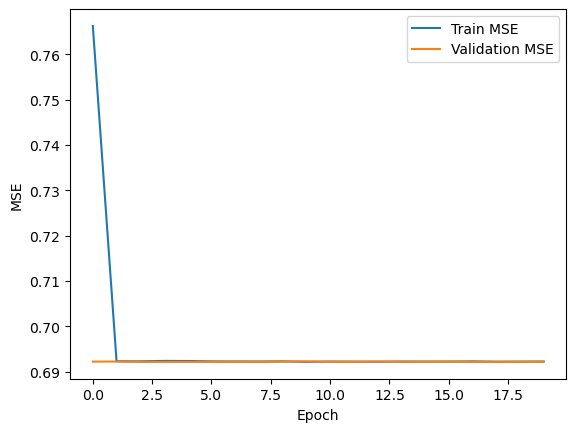

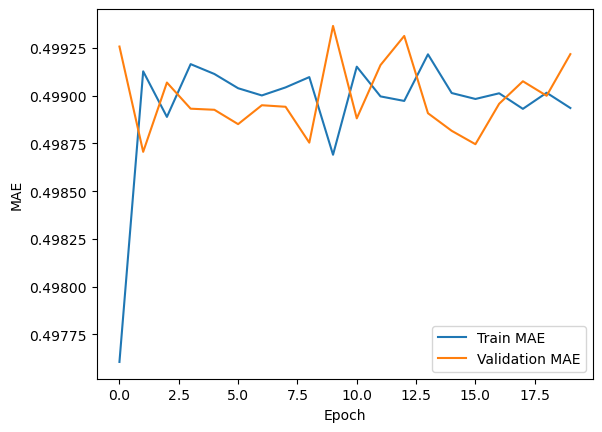

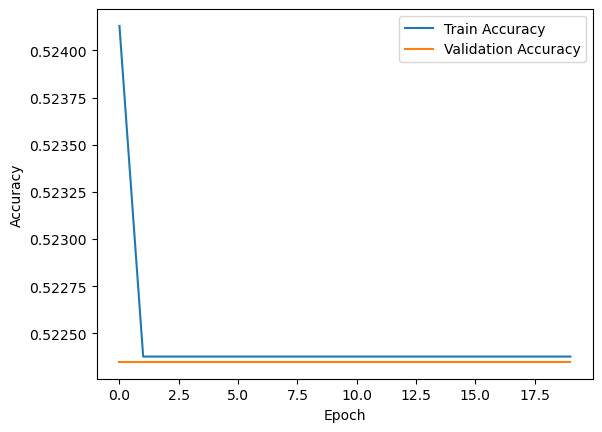

In [15]:
plt.plot(history1.history['loss'], label='Train MSE')
plt.plot(history1.history['val_loss'], label='Validation MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.show()

# Plot MAE
plt.plot(history1.history['mae'], label='Train MAE')
plt.plot(history1.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()

# Plot accuracy
plt.plot(history1.history['accuracy'], label='Train Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model1.save('VGG16_Model')